## Laboratorio 4 
Ignacio Méndez Alvarez (22613) y Diego Soto Flores (22737)

Enlace al repositorio de GitHub: https://github.com/Disotoo/DS-Lab-4.git

In [ ]:
import os, re, glob
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.errors import RasterioIOError
import openeo
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [4]:
lago_atitlan = {
    "west": -91.326256,
    "east": -91.07151,
    "south": 14.5948,
    "north": 14.750979
}
lago_amatitlan = {
    "west": -90.638065,
    "east": -90.512924,
    "south": 14.412347,
    "north": 14.493799
}

In [5]:
fechas_atitlan = ["2025-02-07", "2025-02-12", "2025-02-22", "2025-02-27", "2025-03-04", "2025-03-09", "2025-03-14", "2025-03-24", "2025-03-26", "2025-03-29", "2025-04-03", "2025-04-13", "2025-04-15", "2025-05-03", "2025-05-08", "2025-05-13", "2025-05-25", "2025-05-28", "2025-07-02", "2025-07-12", "2025-07-22", "2025-07-24", "2025-08-01"]
fechas = ["2025-02-07", "2025-02-10", "2025-02-25", "2025-02-27", "2025-03-02", "2025-03-04", "2025-03-07", "2025-03-09", "2025-03-12", "2025-03-14", "2025-03-19", "2025-03-22", "2025-03-24", "2025-03-26", "2025-04-03", "2025-04-11", "2025-04-13", "2025-04-15", "2025-04-16", "2025-04-18", "2025-04-28", "2025-05-03", "2025-05-13", "2025-05-28", "2025-07-10", "2025-07-17", "2025-07-20", "2025-07-24", "2025-08-01"]

In [ ]:
for fecha in fechas:
    try:
        # Lago Atitlán
        atitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_atitlan,
            temporal_extent=[fechas_atitlan, fechas_atitlan],  
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = atitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs1/{fechas_atitlan}.tiff")

        # Lago Amatitlán
        amatitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_amatitlan,
            temporal_extent=[fecha, fecha],
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = amatitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs2/{fecha}.tiff")

    except Exception as e:
        print(f"No se pudo procesar la fecha {fecha}: {e}")
        continue

0:00:00 Job 'j-2508130457244cd6886282ba50d443c2': send 'start'
0:00:14 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:19 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:25 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:34 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:44 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:56 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:12 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:31 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:56 Job 'j-2508130457244cd6886282ba50d443c2': finished (progress 100%)


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs1/{fecha}.tiff")
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


0:00:00 Job 'j-25081305013345cabc4d7ecd9cf98dfe': send 'start'
0:00:13 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:18 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:25 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:33 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:43 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:00:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:11 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:31 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:02:26 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:04 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:51 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:04:52 Job 'j-25081305013345cabc4d7ecd9cf98dfe': running (progress N/A)
0:05:52 

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:27: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs2/{fecha}.tiff")


0:00:00 Job 'j-2508130508034148a2404456d1e09266': send 'start'
0:00:13 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:18 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:25 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:33 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:43 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:55 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:01:11 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:30 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:55 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:02:25 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:02 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:49 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:04:48 Job 'j-2508130508034148a2404456d1e09266': running (progress N/A)
0:05:4

In [ ]:
for fecha in fechas_atitlan:
    try:
        # Lago Atitlán
        atitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_atitlan,
            temporal_extent=[fecha, fecha],  
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = atitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs1/{fecha}.tiff")

    except Exception as e:
        print(f"No se pudo procesar la fecha {fecha}: {e}")
        continue

0:00:00 Job 'j-25081600295346a7919181003c6332f0': send 'start'
0:00:13 Job 'j-25081600295346a7919181003c6332f0': created (progress 0%)
0:00:18 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:00:25 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:00:33 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:00:43 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:00:56 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:01:11 Job 'j-25081600295346a7919181003c6332f0': queued (progress 0%)
0:01:31 Job 'j-25081600295346a7919181003c6332f0': running (progress N/A)
0:01:55 Job 'j-25081600295346a7919181003c6332f0': running (progress N/A)
0:02:25 Job 'j-25081600295346a7919181003c6332f0': finished (progress 100%)


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20864\847354837.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs1/{fecha}.tiff")
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


0:00:00 Job 'j-2508160034184088bb80658ff68e3ac9': send 'start'
0:00:13 Job 'j-2508160034184088bb80658ff68e3ac9': created (progress 0%)
0:00:19 Job 'j-2508160034184088bb80658ff68e3ac9': created (progress 0%)
0:00:25 Job 'j-2508160034184088bb80658ff68e3ac9': created (progress 0%)
0:00:33 Job 'j-2508160034184088bb80658ff68e3ac9': created (progress 0%)
0:00:43 Job 'j-2508160034184088bb80658ff68e3ac9': created (progress 0%)
0:00:56 Job 'j-2508160034184088bb80658ff68e3ac9': running (progress N/A)
0:01:11 Job 'j-2508160034184088bb80658ff68e3ac9': running (progress N/A)
0:01:31 Job 'j-2508160034184088bb80658ff68e3ac9': running (progress N/A)
0:01:55 Job 'j-2508160034184088bb80658ff68e3ac9': finished (progress 100%)
0:00:00 Job 'j-250816003823459aad20801fb6c23fb8': send 'start'
0:00:13 Job 'j-250816003823459aad20801fb6c23fb8': created (progress 0%)
0:00:19 Job 'j-250816003823459aad20801fb6c23fb8': created (progress 0%)
0:00:26 Job 'j-250816003823459aad20801fb6c23fb8': created (progress 0%)
0:00

#### 6. Análisis temporal 

Error en Amatitlan/2025-04-03.tiff: 'Amatitlan\2025-04-03.tiff' not recognized as being in a supported file format.
Amatitlan: timeseries_Amatitlan.csv -> 18 filas


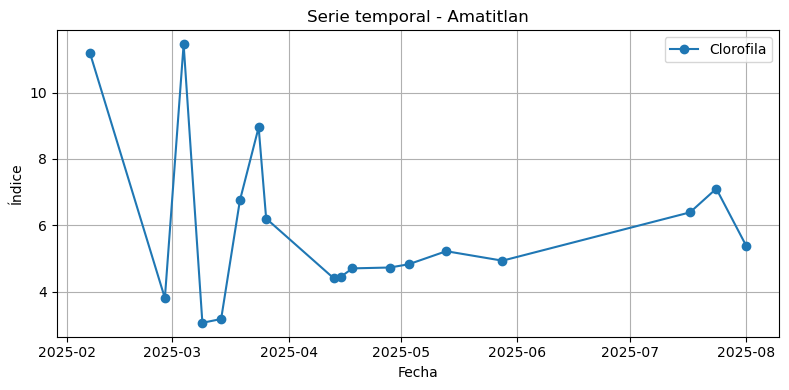

Error en Atitlan/2025-03-09.tiff: Read failed. See previous exception for details.
Atitlan: timeseries_Atitlan.csv -> 22 filas


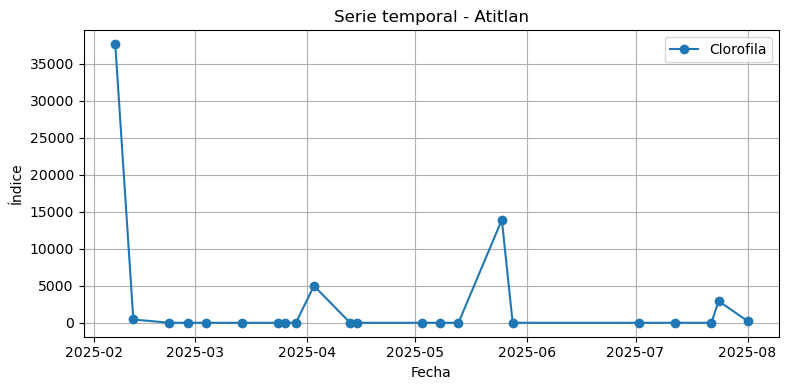

timeseries_all_lakes.csv


In [ ]:

LAKES = {"Amatitlan": "Amatitlan", "Atitlan": "Atitlan"} 
DATE_RE = re.compile(r"(\d{4}-\d{2}-\d{2})")
MNDWI_THRESHOLD = 0.42
NDWI_THRESHOLD  = 0.40
FILTER_UABS     = True


def safe_div(a, b):
    out = np.zeros_like(a, dtype=np.float32)
    m = b != 0
    out[m] = a[m] / b[m]
    return out

def ndvi(nir, red):        return safe_div(nir - red, nir + red)
def mndwi(g, s1):         return safe_div(g - s1, g + s1)
def ndwi(g, nir):         return safe_div(g - nir, g + nir)
def ndwi_leaves(nir, s1): return safe_div(nir - s1, nir + s1)
def awei_sh(b, g, nir, s1, s2):  return b + 2.5*g - 1.5*(nir + s1) - 0.25*s2
def awei_nsh(g, nir, s1):        return 4*(g - s1) - (0.25*nir + 2.75*s1)
def dbsi(s1, g, ndvi_val):       return safe_div((s1 - g), (s1 + g)) - ndvi_val
def fai(red665, re783, nir865):  return (re783 - red665) - (nir865 - red665) * ((783-665)/(865-665))
def ndci(red665, red705):        return safe_div((red705 - red665), (red705 + red665))
def safe_mean(x):
    x = x.astype("float32")
    x = x[np.isfinite(x)]
    return float(x.mean()) if x.size else np.nan


def process_tif(path):
    with rasterio.open(path) as src:
        arr = src.read()

        # máscara NoData
        if src.nodata is not None:
            nodata_mask = np.any(arr == src.nodata, axis=0) if arr.ndim == 3 else (arr == src.nodata)
        else:
            nodata_mask = np.zeros(arr.shape[-2:], bool) if arr.ndim == 3 else np.zeros(arr.shape, bool)

        if src.count >= 9:
            B02,B03,B04,B05,B07,B08,B8A,B11,B12 = [arr[i-1].astype("float32") for i in [1,2,3,4,5,6,7,8,9]]
            for b in (B02,B03,B04,B05,B07,B08,B8A,B11,B12):
                b[nodata_mask] = np.nan

            ndvi_v   = ndvi(B08, B04)
            mndwi_v  = mndwi(B03, B11)
            ndwi_v   = ndwi(B03, B08)
            ndwi_l_v = ndwi_leaves(B08, B11)
            awei_sh_v  = awei_sh(B02, B03, B08, B11, B12)
            awei_nsh_v = awei_nsh(B03, B08, B11)
            dbsi_v   = dbsi(B11, B03, ndvi_v)

            # máscara de agua
            water = (
                (mndwi_v > MNDWI_THRESHOLD) |
                (ndwi_v  > NDWI_THRESHOLD)  |
                (awei_nsh_v > 0.1879)       |
                (awei_sh_v  > 0.1112)       |
                (ndvi_v < -0.2)             |
                (ndwi_l_v > 1)
            )
            if FILTER_UABS:
                water = water & ~((awei_nsh_v <= -0.03) | (dbsi_v > 0))

            # FAI y clorofila
            FAIv  = fai(B04, B07, B8A)
            NDCIv = ndci(B04, B05)
            chl   = 826.57*(NDCIv**3) - 176.43*(NDCIv**2) + 19*NDCIv + 4.071
            chl   = np.clip(chl, 0, None)  

            water_px = np.isfinite(chl) & water
            open_px  = water_px & (FAIv <= 0.08)
            mean_chl_open = safe_mean(chl[open_px])

            ndvi_mean = safe_mean(ndvi_v[water])
            ndwi_mean = safe_mean(ndwi_v[water])

            return {
                "mode": "multiband",
                "value": mean_chl_open,
                "NDVI_mean": ndvi_mean,
                "NDWI_mean": ndwi_mean
            }
        else:
            band = arr[0].astype("float32")
            band[nodata_mask] = np.nan
            return {
                "mode": "singleband",
                "value": safe_mean(band),
                "NDVI_mean": np.nan,
                "NDWI_mean": np.nan
            }


all_rows = []

for lake, folder in LAKES.items():
    rows = []
    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".tif", ".tiff")):
            continue
        m = DATE_RE.search(fname)
        if not m:
            continue
        date = pd.to_datetime(m.group(1))
        path = os.path.join(folder, fname)

        try:
            met = process_tif(path)
            rows.append({
                "date": date,
                "value": met["value"],
                "NDVI_mean": met["NDVI_mean"],
                "NDWI_mean": met["NDWI_mean"]
            })
        except Exception as e:
            print(f"Error en {folder}/{fname}: {e}")

    df = pd.DataFrame(rows).sort_values("date").set_index("date")
    out_csv = f"timeseries_{lake}.csv"
    df.to_csv(out_csv)
    print(f"{lake}: {out_csv} -> {len(df)} filas")

    # Muestra la gráfica 
    if not df.empty:
        plt.figure(figsize=(8,4))
        plt.plot(df.index, df["value"], marker="o", label="Clorofila")
        plt.title(f"Serie temporal - {lake}")
        plt.xlabel("Fecha")
        plt.ylabel("Índice")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show(block=False)
        plt.pause(2)
        plt.close()

    # Guardar filas para CSV combinado
    for d, row in df.iterrows():
        all_rows.append({
            "lake": lake,
            "date": d,
            "value": row["value"],
            "NDVI_mean": row["NDVI_mean"],
            "NDWI_mean": row["NDWI_mean"]
        })

if all_rows:
    all_df = pd.DataFrame(all_rows).sort_values(["lake","date"])
    all_df.to_csv("timeseries_all_lakes.csv", index=False)
    print("timeseries_all_lakes.csv")


#### Picos en fechas importantes

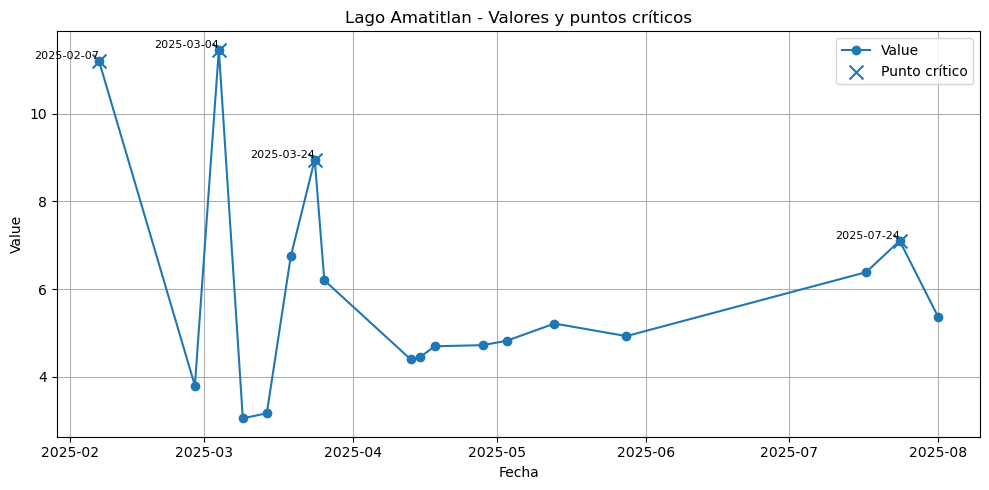

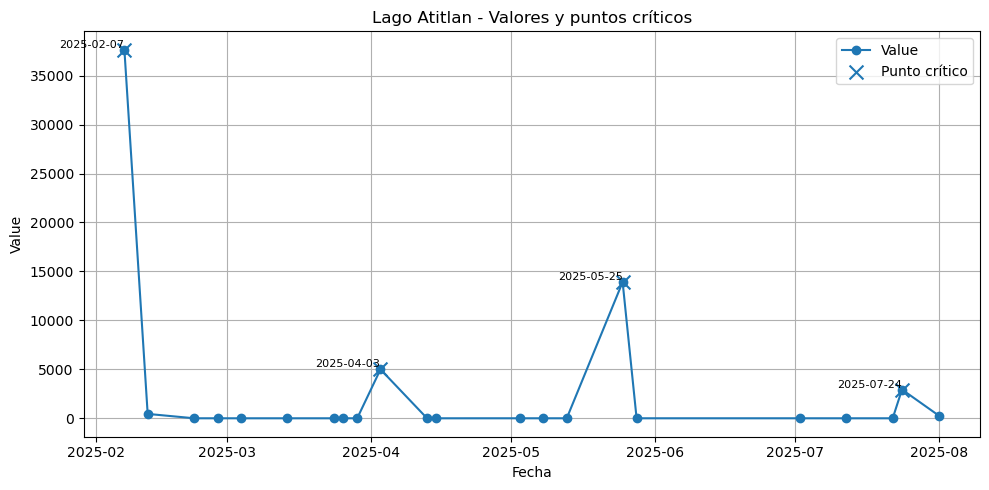


=== Puntos críticos detectados ===

Lago: Amatitlan
  - 2025-02-07  ->  valor = 11.2033
  - 2025-03-04  ->  valor = 11.4566
  - 2025-03-24  ->  valor = 8.9532
  - 2025-07-24  ->  valor = 7.1014

Lago: Atitlan
  - 2025-02-07  ->  valor = 37636.9023
  - 2025-04-03  ->  valor = 4998.1782
  - 2025-05-25  ->  valor = 13912.2988
  - 2025-07-24  ->  valor = 2937.7996


In [4]:
Z_THRESHOLD = 2.0   
K_MIN = 4          

df = pd.read_csv("datos.csv")
df["date"] = pd.to_datetime(df["date"])

# Esta función devuelve los puntos críticos del lago
def puntos_criticos_por_lago(subdf, k_min=K_MIN, z_thresh=Z_THRESHOLD):
    
    v = subdf["value"]
    mean, std = v.mean(), v.std(ddof=0)

    if std == 0:
        crit = subdf.nlargest(k_min, "value")
    else:
        z = (v - mean) / std
        crit = subdf[z > z_thresh]
        if len(crit) < k_min:
            extra = subdf.nlargest(k_min, "value")
            crit = pd.concat([crit, extra]).drop_duplicates().nlargest(k_min, "value")

    return crit.sort_values("value", ascending=False)

criticos_todos = []

for lake, subdf in df.groupby("lake"):
    subdf = subdf.sort_values("date")
    crit = puntos_criticos_por_lago(subdf)
    criticos_todos.append(crit.assign(lake=lake)[["lake", "date", "value"]])

    # Gráfica por lago
    plt.figure(figsize=(10, 5))
    plt.plot(subdf["date"], subdf["value"], marker="o", label="Value")
    plt.scatter(crit["date"], crit["value"], marker="x", s=100, label="Punto crítico")
    for _, r in crit.iterrows():
        plt.text(r["date"], r["value"], f"{r['date'].date()}",
                 fontsize=8, ha="right", va="bottom")
    plt.title(f"Lago {lake} - Valores y puntos críticos")
    plt.xlabel("Fecha")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

criticos_df = pd.concat(criticos_todos, ignore_index=True)
print("\n=== Puntos críticos detectados ===")
for lake, subdf in criticos_df.groupby("lake"):
    print(f"\nLago: {lake}")
    for _, r in subdf.sort_values("date").iterrows():
        print(f"  - {r['date'].date()}  ->  valor = {r['value']:.4f}")



#### 7. Análisis espacial (Mapeos)

[SKIP] amatitlan\2025-04-03.tiff: 'amatitlan\2025-04-03.tiff' not recognized as being in a supported file format.


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_1252\815832050.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


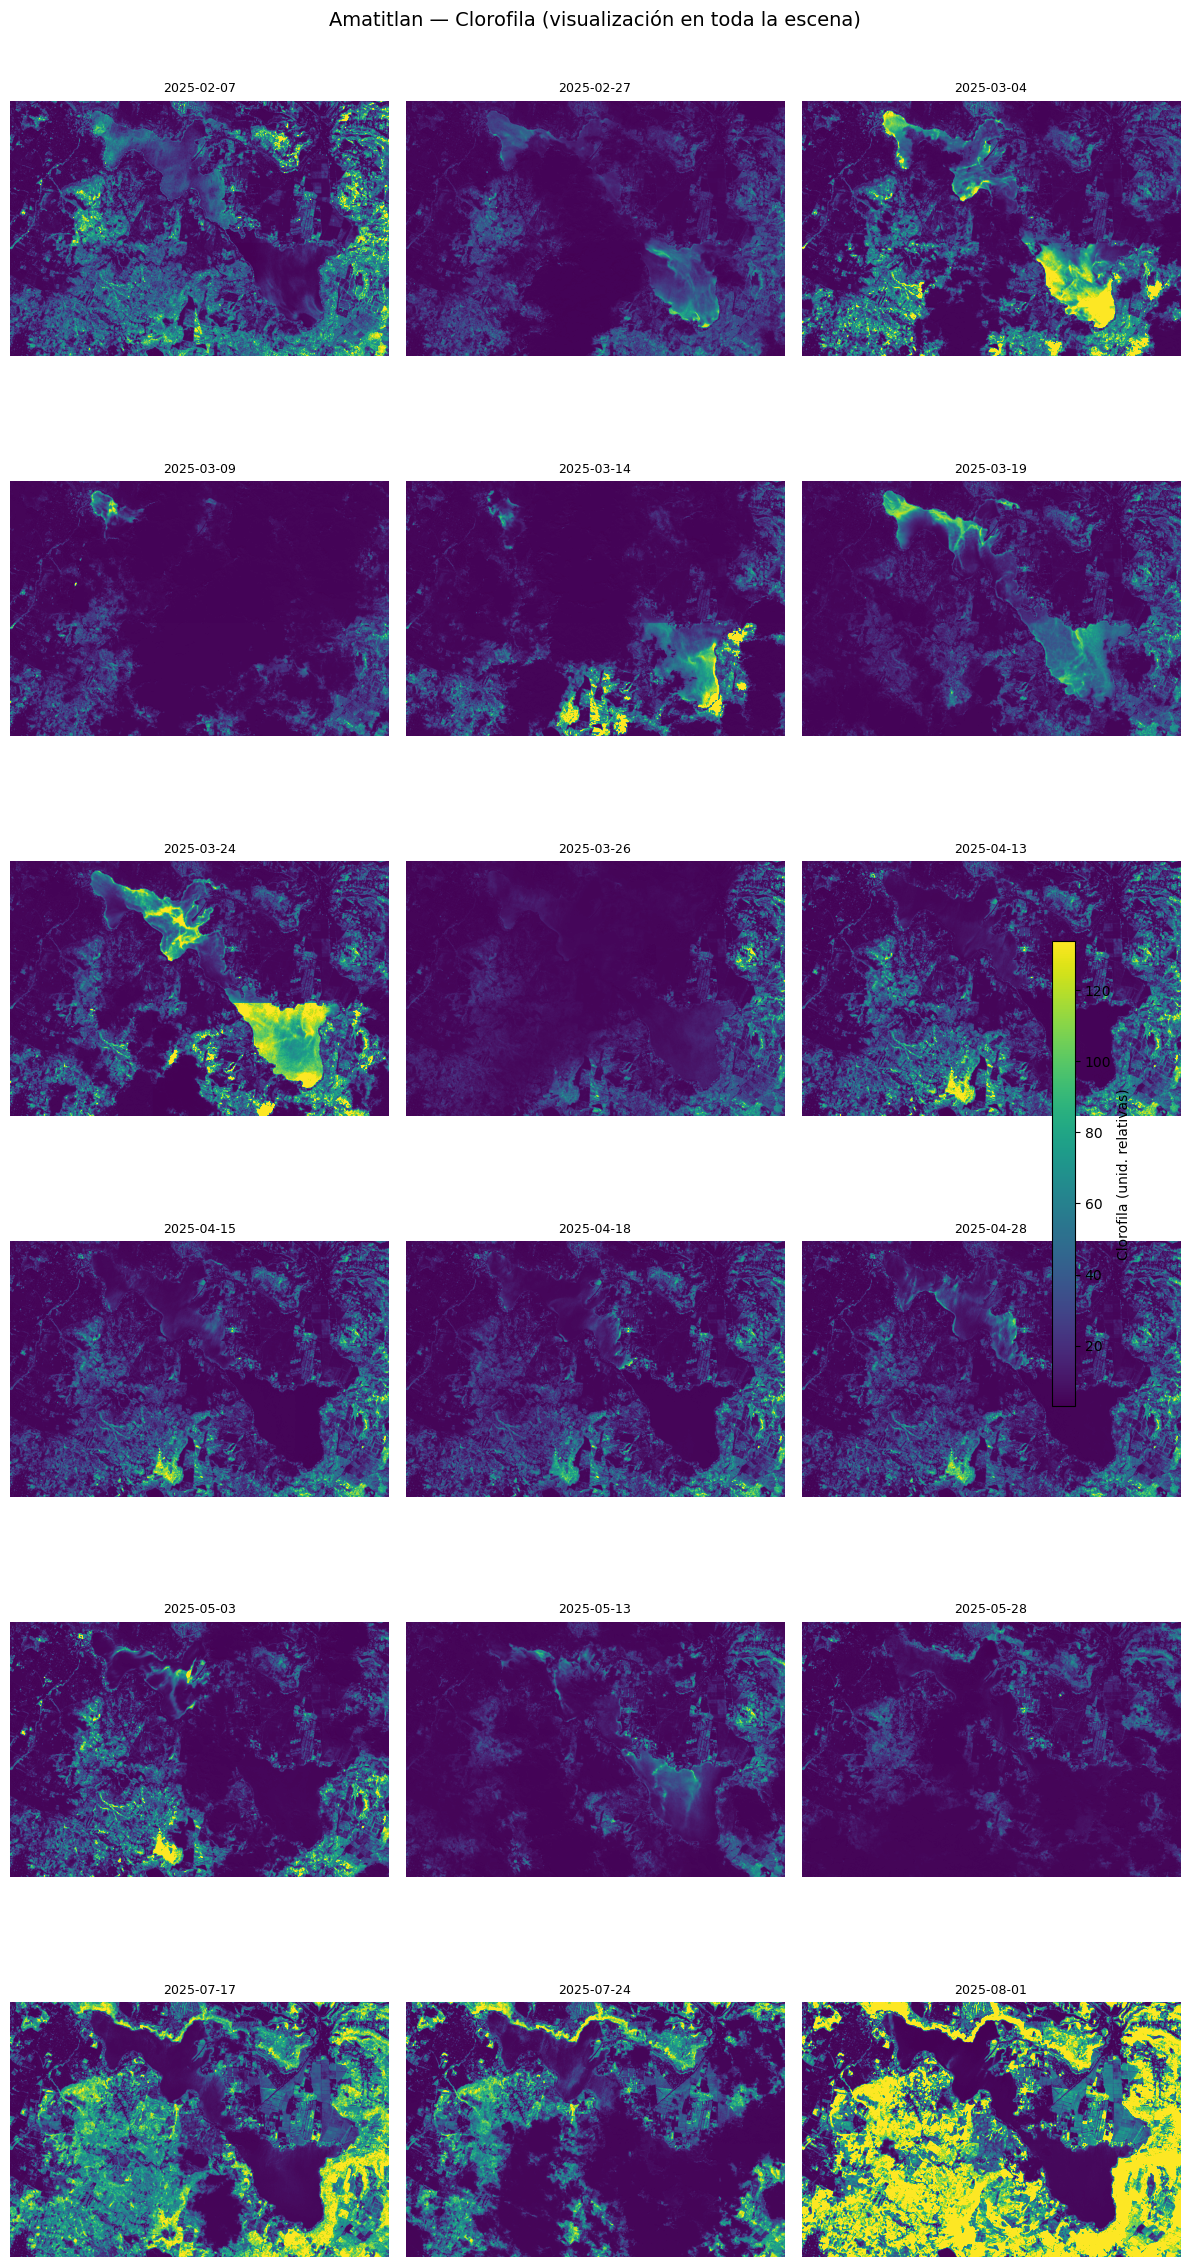

[SKIP] atitlan\2025-03-09.tiff: Read failed. See previous exception for details.


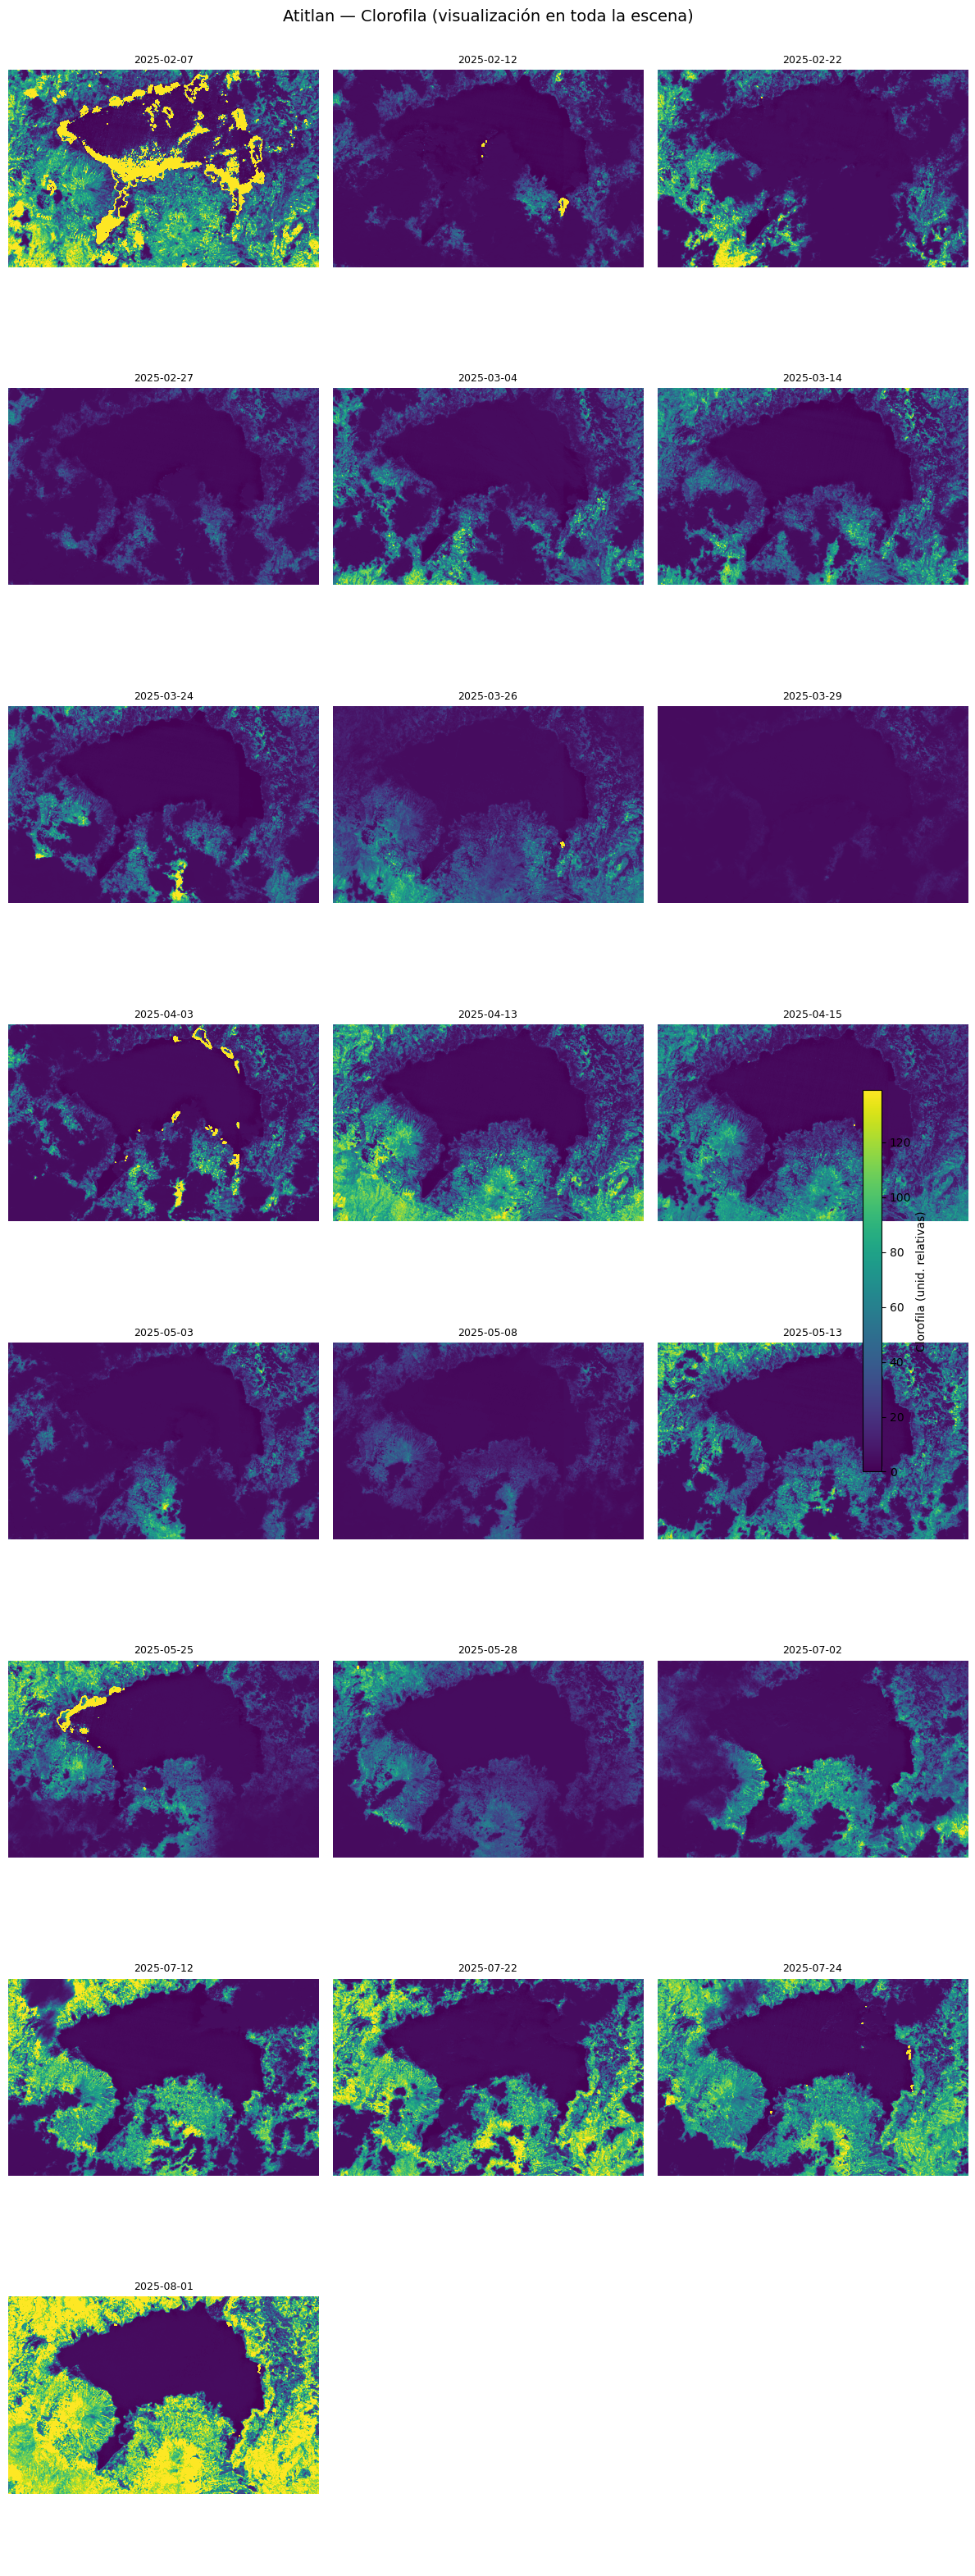

In [5]:
LAKE_DIRS = {"Amatitlan": "amatitlan", "Atitlan": "atitlan"}  
N_COLS = 3  # columnas del grid

def extract_date_from_name(path):
    m = DATE_RE.search(os.path.basename(path))
    return m.group(1) if m else os.path.basename(path)

# Esta función devuelve un mapa de clorofila 
def chl_map_with_filter(path):
    
    try:
        with rasterio.open(path) as src:
            arr = src.read()

            # Máscara NoData
            if src.nodata is not None:
                nodata_mask = np.any(arr == src.nodata, axis=0) if arr.ndim == 3 else (arr == src.nodata)
            else:
                nodata_mask = np.zeros(arr.shape[-2:], bool) if arr.ndim == 3 else np.zeros(arr.shape, bool)

            if src.count >= 9:
                B02,B03,B04,B05,B07,B08,B8A,B11,B12 = [arr[i-1].astype("float32") for i in [1,2,3,4,5,6,7,8,9]]
                for b in (B02,B03,B04,B05,B07,B08,B8A,B11,B12):
                    b[nodata_mask] = np.nan

                # Índices
                ndvi_v   = ndvi(B08, B04)
                mndwi_v  = mndwi(B03, B11)
                ndwi_v   = ndwi(B03, B08)
                ndwi_l_v = ndwi_leaves(B08, B11)
                awei_sh_v  = awei_sh(B02, B03, B08, B11, B12)
                awei_nsh_v = awei_nsh(B03, B08, B11)
                dbsi_v   = dbsi(B11, B03, ndvi_v)

                water = (
                    (mndwi_v > MNDWI_THRESHOLD) |
                    (ndwi_v  > NDWI_THRESHOLD)  |
                    (awei_nsh_v > 0.1879)       |
                    (awei_sh_v  > 0.1112)       |
                    (ndvi_v < -0.2)             |
                    (ndwi_l_v > 1)
                )
                if FILTER_UABS:
                    water = water & ~((awei_nsh_v <= -0.03) | (dbsi_v > 0))

                FAIv  = fai(B04, B07, B8A)
                NDCIv = ndci(B04, B05)

                # Clorofila
                chl   = 826.57*(NDCIv**3) - 176.43*(NDCIv**2) + 19*NDCIv + 4.071
                chl   = np.clip(chl, 0, None)  
                chl[nodata_mask] = np.nan      

                chl_map = chl

            else:
                band = arr[0].astype("float32")
                band[nodata_mask] = np.nan
                chl_map = band

    except RasterioIOError as e:
        print(f"[SKIP] {path}: {e}")
        return None, None

    title = extract_date_from_name(path)
    return chl_map, title

# GRID por lago 
N_COLS = 3  

for lake, folder in LAKE_DIRS.items():
    paths = sorted(glob.glob(os.path.join(folder, "*.tif"))) \
          + sorted(glob.glob(os.path.join(folder, "*.tiff"))) \
          + sorted(glob.glob(os.path.join(folder, "*.jp2")))

    if not paths:
        print(f"[Aviso] No se encontraron rasters para {lake} en '{folder}'.")
        continue

    maps, titles = [], []
    for p in paths:
        chl_map, t = chl_map_with_filter(p)
        if chl_map is None:
            continue  # se salta corruptos/no soportados
        maps.append(chl_map)
        titles.append(t)

    if not maps:
        print(f"[Aviso] No se pudieron abrir rasters válidos para {lake}.")
        continue

    # Normalización por lago 
    all_vals = np.concatenate([m[np.isfinite(m)] for m in maps if np.isfinite(m).any()])
    if all_vals.size:
        vmin = float(np.nanpercentile(all_vals, 2))
        vmax = float(np.nanpercentile(all_vals, 98))
        if vmin == vmax:
            vmin = float(np.nanmin(all_vals))
            vmax = float(np.nanmax(all_vals))
    else:
        vmin = vmax = None  

    # Grid
    n = len(maps)
    n_rows = int(np.ceil(n / N_COLS))
    fig, axes = plt.subplots(n_rows, N_COLS, figsize=(4*N_COLS, 4*n_rows))
    axes = np.atleast_1d(axes).ravel()

    mappable = None
    for i, (m, title) in enumerate(zip(maps, titles)):
        ax = axes[i]
        m_plot = m.copy()
        if vmin is not None:
            m_plot[~np.isfinite(m_plot)] = vmin
        im = ax.imshow(m_plot, vmin=vmin, vmax=vmax)  
        ax.set_title(title, fontsize=9)
        ax.axis("off")
        mappable = im

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"{lake} — Clorofila (visualización en toda la escena)", fontsize=14)
    if mappable is not None:
        cbar = fig.colorbar(mappable, ax=axes[:n], fraction=0.025, pad=0.02)
        cbar.set_label("Clorofila (unid. relativas)")
    plt.tight_layout()
    plt.show()


#### 8. Correlación NDVI y NDWI

[Amatitlan] r(NDVI,value)=0.005 (p=0.984) | r(NDWI,value)=0.335 (p=0.174)


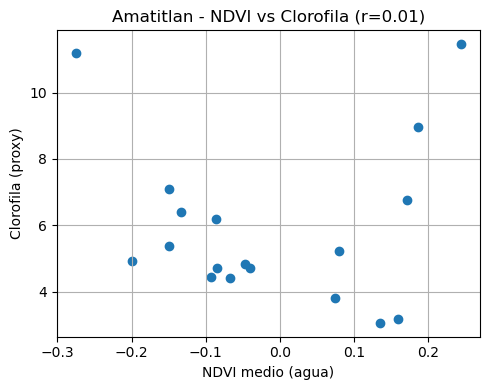

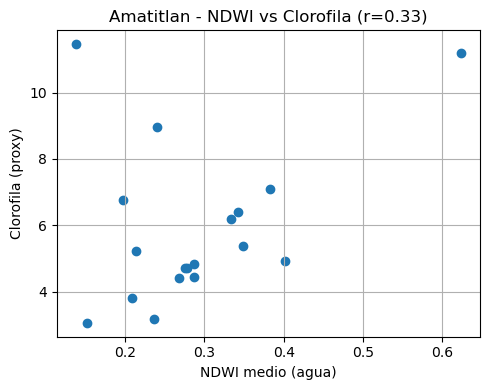

[Atitlan] r(NDVI,value)=0.820 (p=3.02e-06) | r(NDWI,value)=0.718 (p=0.000169)


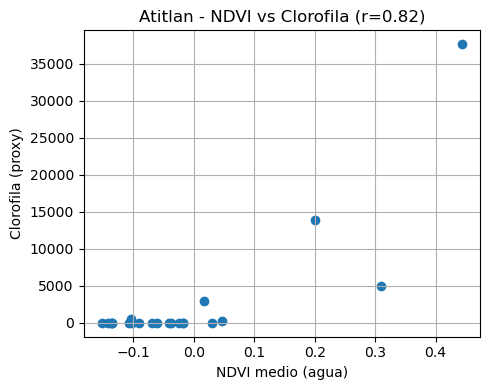

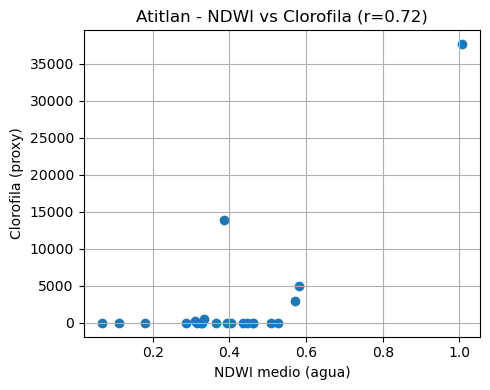

In [ ]:
from scipy.stats import pearsonr
for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    dfc = df_lake.dropna(subset=["value","NDVI_mean","NDWI_mean"]).copy()
    if dfc.empty:
        continue
    
    # Correlación NDVI
    r_ndvi, p_ndvi = pearsonr(dfc["NDVI_mean"], dfc["value"])
    # Correlación NDWI
    r_ndwi, p_ndwi = pearsonr(dfc["NDWI_mean"], dfc["value"])
    print(f"[{lake}] r(NDVI,value)={r_ndvi:.3f} (p={p_ndvi:.3g}) | r(NDWI,value)={r_ndwi:.3f} (p={p_ndwi:.3g})")

    plt.figure(figsize=(5,4))
    plt.scatter(dfc["NDVI_mean"], dfc["value"])
    plt.title(f"{lake} - NDVI vs Clorofila (r={r_ndvi:.2f})")
    plt.xlabel("NDVI medio (agua)"); plt.ylabel("Clorofila (proxy)")
    plt.grid(True); plt.tight_layout()
    plt.show(block=False); plt.pause(2); plt.close()

    plt.figure(figsize=(5,4))
    plt.scatter(dfc["NDWI_mean"], dfc["value"])
    plt.title(f"{lake} - NDWI vs Clorofila (r={r_ndwi:.2f})")
    plt.xlabel("NDWI medio (agua)"); plt.ylabel("Clorofila (proxy)")
    plt.grid(True); plt.tight_layout()
    plt.show(block=False); plt.pause(2); plt.close()

#### Explicación de hallazgos:

En el Lago de Amatitlán, los resultados muestran que la correlación entre el NDVI y la concentración de clorofila es prácticamente nula (r ≈ 0.005, p = 0.984), lo que indica que el índice de vegetación no captura variaciones asociadas a la proliferación algal en este lago. En cuanto al otro indicador, la relación entre NDWI y clorofila es positiva pero débil (r ≈ 0.335, p = 0.174) y no estadísticamente significativa. Esto señala que, al menos para Amatitlán, los índices espectrales analizados no son buenos predictores de la presencia de cianobacterias, probablemente debido a las características ópticas del lago, que enmascaran la señal.

Por otro lado, en el Lago de Atitlán se observa una relación fuerte y estadísticamente significativa. El NDVI muestra una correlación positiva muy alta con la clorofila (r ≈ 0.820, p < 0.001), lo cual indica que el aumento de biomasa algal se refleja directamente en el incremento del índice de vegetación, dado que las cianobacterias en superficie generan una marca espectral similar a la vegetación. En cuanto al otro indicador, el NDWI también presenta una correlación positiva considerable (r ≈ 0.718, p < 0.001), lo que señala que este índice también es sensible a los cambios en la calidad del agua vinculados a la proliferación de cianobacterias.

#### 9. Comparación de lagos

In [7]:
stats_rows = []
for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    desc = df_lake.describe()[["value","NDVI_mean","NDWI_mean"]]
    desc.to_csv(f"stats_{lake}.csv")
    print(f"Estadísticos -> stats_{lake}.csv")
    stats_rows.append(desc.assign(lake=lake))

if stats_rows:
    stats_all = pd.concat(stats_rows, axis=0)
    print(stats_all)


Estadísticos -> stats_Amatitlan.csv
Estadísticos -> stats_Atitlan.csv
              value  NDVI_mean  NDWI_mean       lake
count     18.000000  18.000000  18.000000  Amatitlan
mean       5.927295  -0.015551   0.289644  Amatitlan
std        2.434554   0.150362   0.110814  Amatitlan
min        3.056589  -0.274690   0.138436  Amatitlan
25%        4.513748  -0.123617   0.219339  Amatitlan
50%        5.072861  -0.057455   0.277203  Amatitlan
75%        6.655895   0.120614   0.340021  Amatitlan
max       11.456603   0.243798   0.623092  Amatitlan
count     22.000000  22.000000  22.000000    Atitlan
mean    2737.621647  -0.014965   0.400086    Atitlan
std     8392.410123   0.151915   0.189651    Atitlan
min        2.034945  -0.152603   0.066716    Atitlan
25%        2.615899  -0.106591   0.317213    Atitlan
50%        3.291244  -0.051290   0.389785    Atitlan
75%      185.000562   0.007668   0.460733    Atitlan
max    37636.902344   0.443628   1.006788    Atitlan


#### Discusión

**Lago de Amatitlán**

Los datos muestran que la concentración media de clorofila (proxy de cianobacterias) fue de aproximadamente 5.93, con un rango desde 3.06 hasta 11.46 y una desviación estándar moderada (std ≈ 2.43). Esto indica proliferaciones periódicas con picos moderados. Se registraron cuatro eventos destacados:

2025-02-07 → 11.20

2025-03-04 → 11.46

2025-03-24 → 8.95

2025-07-24 → 7.10

En conjunto, Amatitlán presenta proliferaciones relativamente frecuentes pero con intensidad moderada, sin alcanzar valores extremos.

**Lago de Atitlán**

Por otro lado, Atitlán mostró una media de clorofila muy elevada, de ≈ 2737.6, con una enorme variabilidad (std ≈ 8392). El valor mínimo fue de 2.03, mientras que el máximo alcanzó 37,636.9. Los picos más notables fueron:

2025-02-07 → 37636.90

2025-04-03 → 4998.18

2025-05-25 → 13912.30

2025-07-24 → 2937.80

Esto evidencia proliferaciones mucho más intensas en Atitlán, algunas extremadamente elevadas.

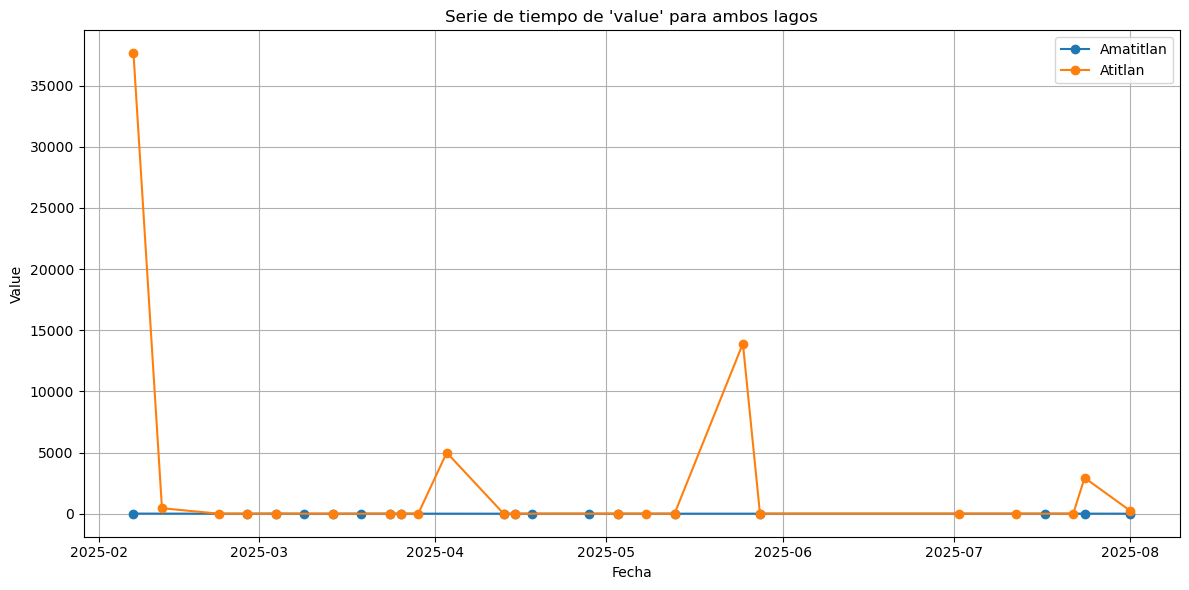

In [8]:
plt.figure(figsize=(12, 6))

for lake, subdf in df.groupby("lake"):
    subdf = subdf.sort_values("date")
    plt.plot(subdf["date"], subdf["value"], marker="o", label=lake)

plt.title("Serie de tiempo de 'value' para ambos lagos")
plt.xlabel("Fecha")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Comparación de intensidad y frecuencia de floraciones

Frecuencia: Amatitlán muestra proliferaciones recurrentes a lo largo del periodo con varios picos moderados, mientras que en Atitlán, aunque también hay múltiples eventos, los picos son esporádicos pero más contundentes.

Intensidad: En Atitlán, la proliferación alcanza cifras drásticamente mayores (miles en lugar de decenas), denotando picos muy intensos, especialmente al inicio del año. Amatitlán, aunque es más estable, presenta niveles mucho inferiores y menos extremos.

Entonces, podemos concluir que Amatitlán tiene mayor frecuencia, pero es de intensidad moderada. Atitlán presenta bloomes menos frecuentes pero mucho más intensos.

#### Posibles diferencias

En el Lago de Atitlán, la proliferación de cianobacterias se asocia principalmente a la entrada excesiva de nutrientes, en particular fósforo y nitrógeno, provenientes de aguas residuales domésticas y escorrentía agrícola. Esta carga de nutrientes genera condiciones de eutrofización que favorecen el crecimiento algal, especialmente cuando las relaciones N:P son bajas (Rejmánková et al., 2011). A ello se suma la deforestación de la cuenca y el uso intensivo del suelo, que aumentan la escorrentía y el aporte de contaminantes al lago (AMSCLAE, 2013). Factores físicos como la estratificación térmica prolongada y el incremento en la temperatura del agua (20 °C a 24 °C en las últimas décadas) también han sido señalados como impulsores de las floraciones (USAC, 2011).

Por su parte, el Lago de Amatitlán recibe una carga contaminante constante desde el río Villalobos, que arrastra aguas residuales urbanas e industriales, así como desechos agrícolas con alto contenido de fósforo y detergentes (Infancia con Futuro, 2022). La cuenca presenta además deforestación y erosión del suelo, lo que incrementa la sedimentación y refuerza el proceso de eutrofización. Estas condiciones explican por qué Amatitlán muestra proliferaciones más frecuentes, aunque generalmente de menor intensidad que en Atitlán.


**Referencias**


AMSCLAE. (2013, 5 de septiembre). Cianobacteria en el Lago de Atitlán. Autoridad para el Manejo Sustentable de la Cuenca del Lago de Atitlán y su Entorno.
https://www.amsclae.gob.gt/2013/09/05/cianobacteria-en-el-lago-de-atitlan/

Infancia con Futuro. (2022). Datos del Lago Amatitlán – Historia y situación actual.
https://www.infanciaconfuturo.org/amatitlan/datos-lago-amatitlan-historia/

Rejmánková, E., Komárek, J., Dix, M., Komárková, J., Girón, N., & Komárková, I. (2011). Cyanobacterial blooms in Lake Atitlán, Guatemala. Hydrobiologia, 678, 33–48. https://doi.org/10.1016/j.aquabot.2010.09.002

Universidad de San Carlos de Guatemala (USAC). (2011). Factores ambientales asociados a la proliferación de cianobacterias en el Lago de Atitlán [Tesis de licenciatura]. Biblioteca de Medicina USAC.
https://biblioteca.medicina.usac.edu.gt/tesis/pre/2011/002.pdf

### 10. Serie temporal

In [ ]:
N_ROWS, N_COLS = 6, 6

def reduce_to_grid(chl_map, n_rows=N_ROWS, n_cols=N_COLS):
    # Se promedia la clorofila por bloques
    H, W = chl_map.shape
    row_edges = np.linspace(0, H, n_rows + 1, dtype=int)
    col_edges = np.linspace(0, W, n_cols + 1, dtype=int)

    reduced = np.full((n_rows, n_cols), np.nan, dtype=np.float32)
    for i in range(n_rows):
        r0, r1 = row_edges[i], row_edges[i+1]
        for j in range(n_cols):
            c0, c1 = col_edges[j], col_edges[j+1]
            block = chl_map[r0:r1, c0:c1]
            if block.size:
                vals = block[np.isfinite(block)]
                if vals.size:
                    reduced[i, j] = float(vals.mean())
    return reduced

In [ ]:
rows = [] 

for lake, folder in LAKE_DIRS.items():
    paths = sorted(glob.glob(os.path.join(folder, "*.tif"))) \
          + sorted(glob.glob(os.path.join(folder, "*.tiff"))) \
          + sorted(glob.glob(os.path.join(folder, "*.jp2")))

    for p in paths:
        date_str = extract_date_from_name(p)
        if not date_str:
            continue
        chl_map, _title = chl_map_with_filter(p) 
        if chl_map is None:
            continue

        reduced = reduce_to_grid(chl_map) 
        for i in range(N_ROWS):
            for j in range(N_COLS):
                y = reduced[i, j]
                if np.isfinite(y):
                    rows.append({
                        "lake": lake,
                        "cell_id": f"{i:02d}_{j:02d}",
                        "ds": pd.to_datetime(date_str),
                        "y": y
                    })

df_grid = pd.DataFrame(rows).sort_values(["lake", "cell_id", "ds"]).reset_index(drop=True)



[SKIP] amatitlan\2025-04-03.tiff: 'amatitlan\2025-04-03.tiff' not recognized as being in a supported file format.
[SKIP] atitlan\2025-03-09.tiff: Read failed. See previous exception for details.


In [ ]:
# Predicción con Prophet
models = {}
forecasts = {}

# Mínimo de observaciones por celda para entrenar
MIN_POINTS = 9
# Horizonte de predicción
HORIZON = 10

for (lake, cell_id), subdf in df_grid.groupby(["lake", "cell_id"]):
    subdf = subdf.dropna().sort_values("ds")
    if len(subdf) < MIN_POINTS:
        continue

    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(subdf[["ds", "y"]])

    future = m.make_future_dataframe(periods=HORIZON)
    fcst = m.predict(future)

    models[(lake, cell_id)] = m
    forecasts[(lake, cell_id)] = fcst[["ds", "yhat", "yhat_lower", "yhat_upper"]].assign(
        lake=lake, cell_id=cell_id
    )

fcst_all = pd.concat(forecasts.values(), ignore_index=True) if forecasts else pd.DataFrame()


INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observation

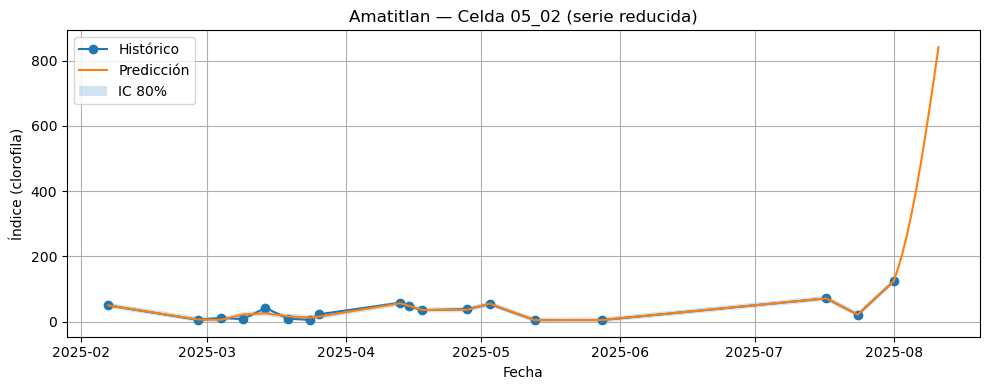

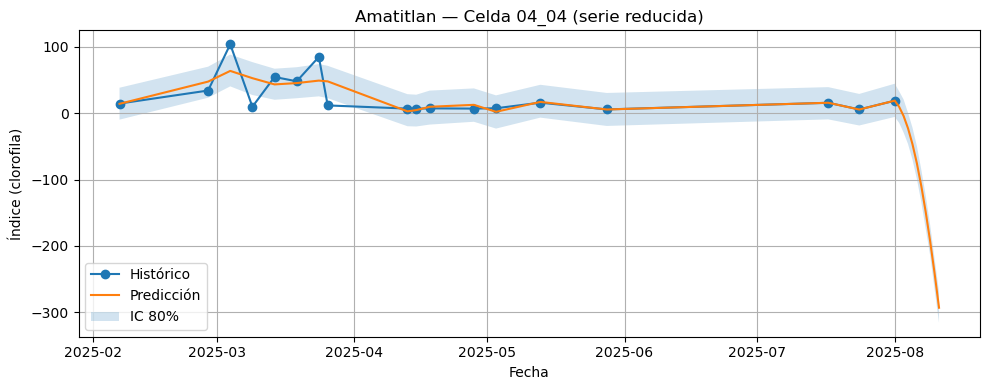

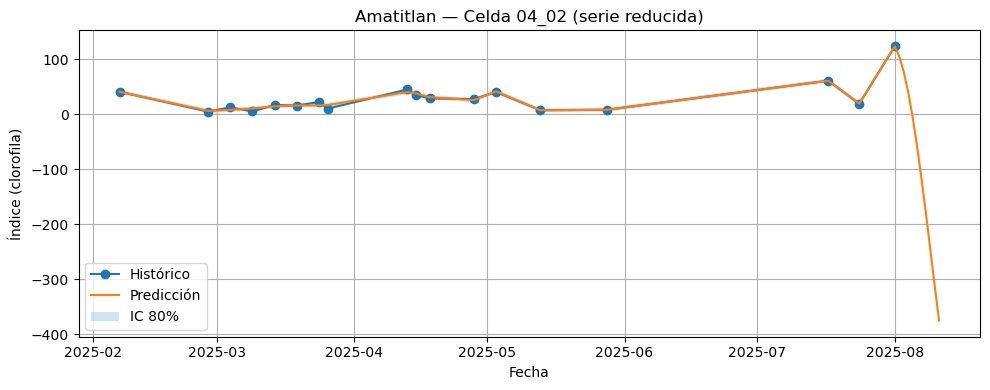

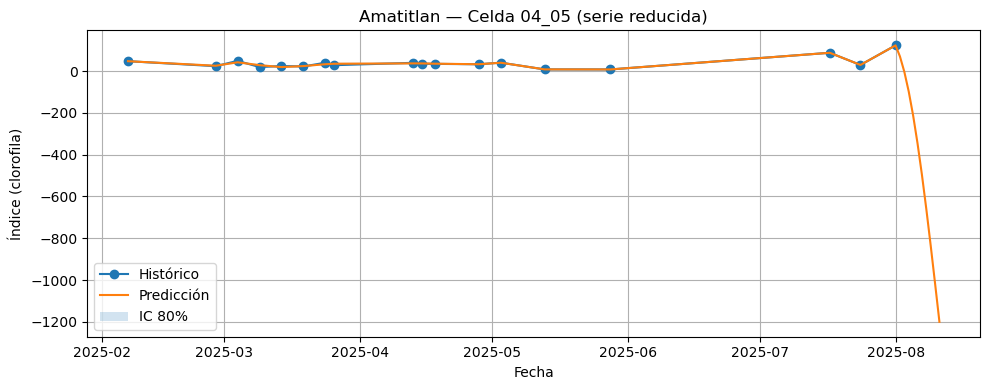

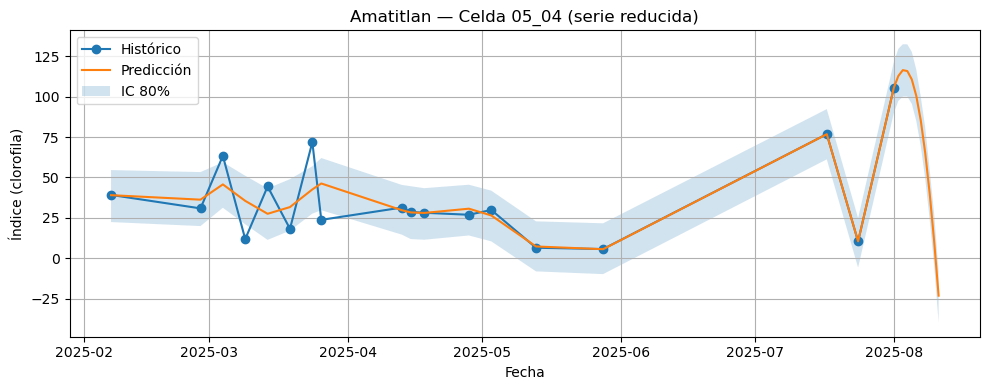

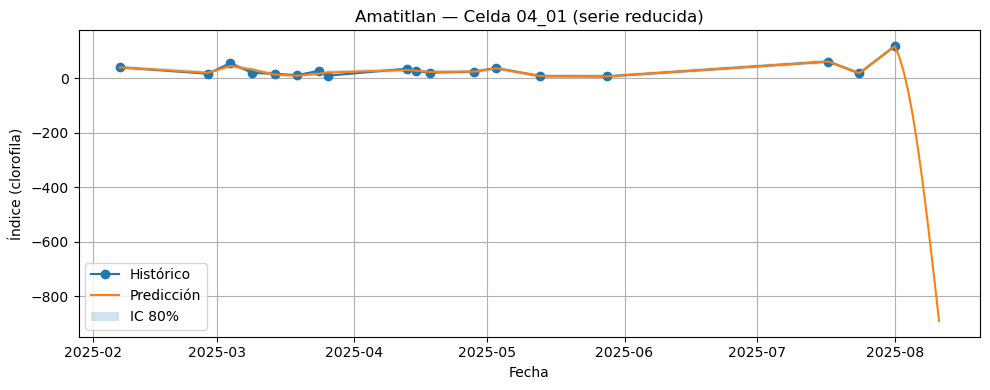

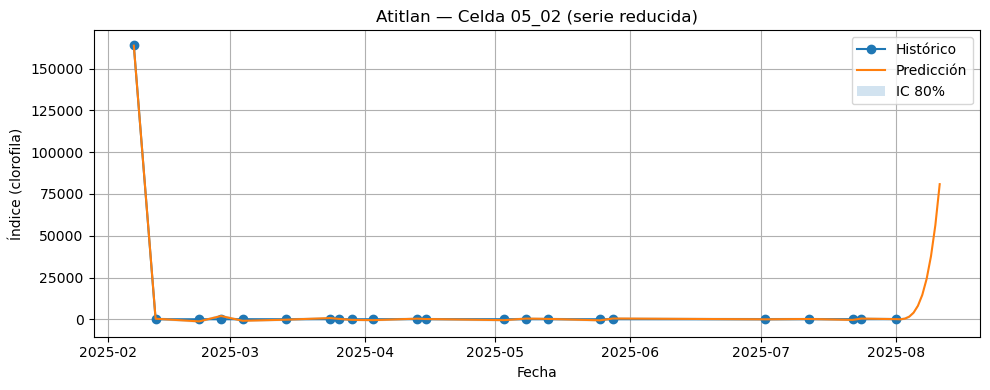

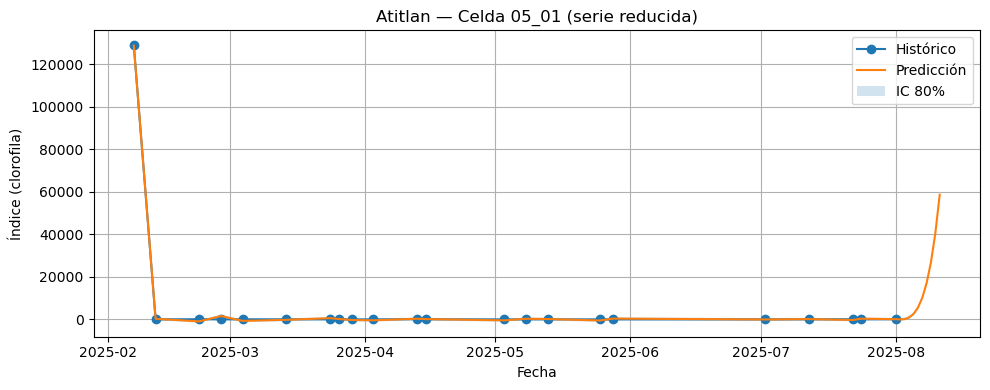

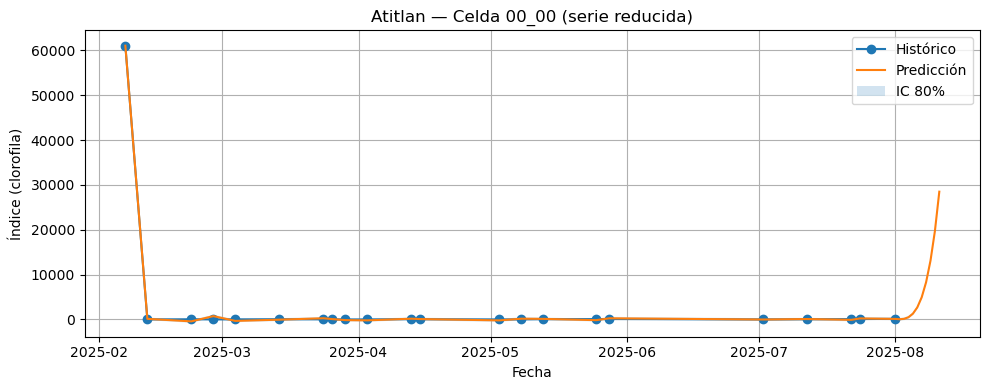

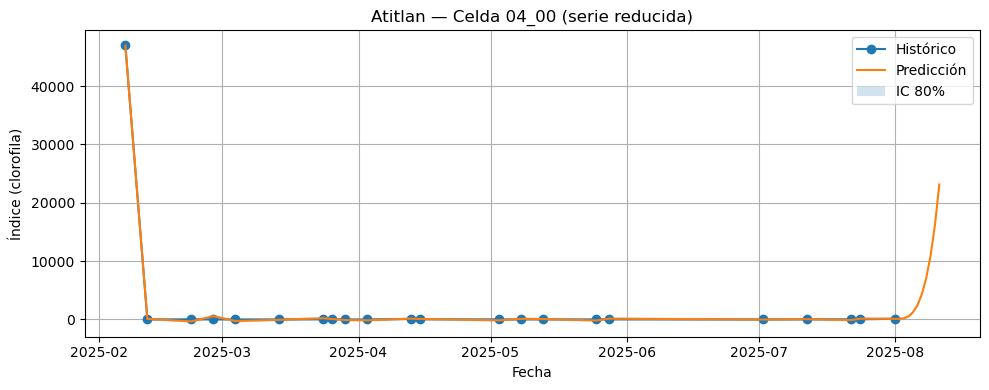

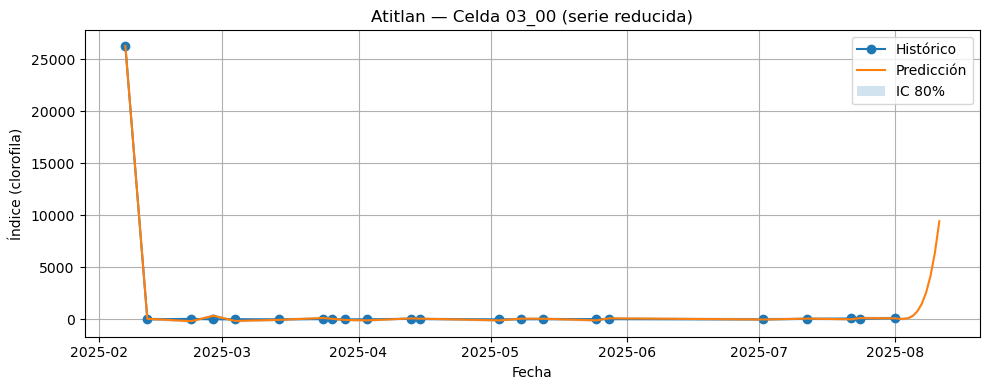

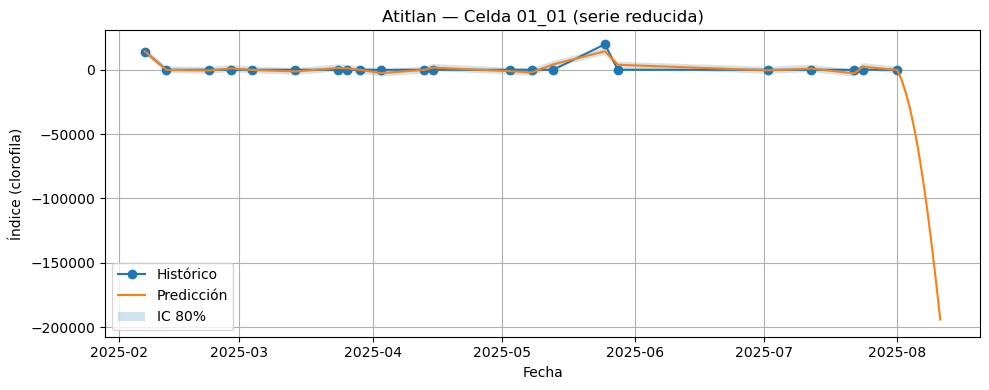

In [ ]:
TOP_K = 6  

for lake, sub in df_grid.groupby("lake"):
    
    var_por_celda = (
        sub.groupby("cell_id")["y"].var().dropna().sort_values(ascending=False)
    )
    top_cells = var_por_celda.head(TOP_K).index

    for cell_id in top_cells:
        hist = sub[sub["cell_id"] == cell_id].sort_values("ds")
        fcst = forecasts.get((lake, cell_id))  
        if fcst is None or hist.empty:
            continue

        plt.figure(figsize=(10, 4))
        plt.plot(hist["ds"], hist["y"], marker="o", label="Histórico")
        plt.plot(fcst["ds"], fcst["yhat"], label="Predicción")
        plt.fill_between(fcst["ds"], fcst["yhat_lower"], fcst["yhat_upper"], alpha=0.2, label="IC 80%")
        plt.title(f"{lake} — Celda {cell_id} (serie reducida)")
        plt.xlabel("Fecha"); plt.ylabel("Índice (clorofila)")
        plt.legend(); plt.grid(True)
        plt.tight_layout(); plt.show()


#### Discusión

En la predicción temporal del índice de cianobacteria mediante Prophet, se observó que las proyecciones son muy similares a los valores históricos, lo que indica que el modelo logra reproducir adecuadamente la dinámica general de cada celda. En particular, las series con mayor variabilidad mantienen patrones adecuados en el horizonte de predicción, y los intervalos de confianza ofrecen un rango confiable de incertidumbre en torno a la estimación central. Aunque los valores extremos de proliferación pueden ser suavizados por el modelo, la eficiencia entre las predicciones y los datos históricos indica que Prophet es una herramienta robusta para anticipar el comportamiento del índice en el corto plazo.

### 11. Modelo de clasificación

In [ ]:
# Parámetro para el modelo
THRESHOLD = 30 

df_clf = df_grid.copy() 
df_clf["label"] = (df_clf["y"] >= THRESHOLD).astype(int)

df_clf["month"] = df_clf["ds"].dt.month
df_clf["dayofyear"] = df_clf["ds"].dt.dayofyear

X = df_clf[["y", "month", "dayofyear"]].values
y = df_clf["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Uso de random forest para clasificar
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

for lake, sub in df_clf.groupby("lake"):
    last_date = sub["ds"].max()
    snap = sub[sub["ds"] == last_date].copy()
    if snap.empty:
        continue

    X_snap = snap[["y", "month", "dayofyear"]].values
    pred_snap = clf.predict(X_snap)
    snap["pred"] = pred_snap
    snap = snap.sort_values("cell_id")

    print(f"\n=== Predicciones — {lake} — {last_date.date()} ===")
    for _, r in snap.iterrows():
        clase = "Cianobacteria" if r["pred"] == 1 else "No Cianobacteria"
        print(f"Celda {r['cell_id']}: {clase} | y={r['y']:.2f}")


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      0.99      0.99        84

    accuracy                           1.00       288
   macro avg       1.00      0.99      1.00       288
weighted avg       1.00      1.00      1.00       288

Matriz de confusión:
 [[204   0]
 [  1  83]]

=== Predicciones — Amatitlan — 2025-08-01 ===
Celda 00_00: Cianobacteria | y=38.39
Celda 00_01: Cianobacteria | y=62.56
Celda 00_02: Cianobacteria | y=53.05
Celda 00_03: Cianobacteria | y=63.53
Celda 00_04: Cianobacteria | y=56.95
Celda 00_05: Cianobacteria | y=91.17
Celda 01_00: No Cianobacteria | y=19.24
Celda 01_01: Cianobacteria | y=49.86
Celda 01_02: No Cianobacteria | y=21.78
Celda 01_03: Cianobacteria | y=48.67
Celda 01_04: Cianobacteria | y=61.66
Celda 01_05: Cianobacteria | y=80.95
Celda 02_00: Cianobacteria | y=51.66
Celda 02_01: Cianobacteria | y=105.79
Celda 02_02: Cianobacteria | 

#### Discusión

Para realizar las predicciones, se dividió la región en un área de 6x6. Con esto, se utilizaron celdas y cada celda representa un área del lago, con el objetivo de no analizar el lago en conjunto, sino agrupando por área y haciendo la predicción sobre ellos. El modelo de clasificación mostró un desempeño muy bueno, alcanzando una exactitud global de casi el 100%. Solo se registró un error de clasificación, lo cual indica que la separación entre áreas con y sin presencia de cianobacteria fue captada de manera muy eficiente por el algoritmo. Sin embargo, este nivel de precisión debe interpretarse con cuidado, porque es importante tomar en cuenta que la cantidad de datos utilizados para el entrenamiento fue bastante baja. Esto puede hacer que el modelo se ajuste demasiado a los patrones observados y no necesariamente garantice un desempeño igual de alto al aplicarse en escenarios con mayor variabilidad espacial o temporal. Por esto, se recomienda descargar una mayor cantidad de datos para el entrenamiento y así mejorar la certeza de los resultados.

### 13. Modelo hibrido

In [ ]:
# Días a predecir
HORIZON = 10
prophet_preds = []

for (lake, cell_id), subdf in df_grid.groupby(["lake", "cell_id"]):
    subdf = subdf.dropna().sort_values("ds")
    if len(subdf) < 6:  
        continue
    
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(subdf[["ds", "y"]])
    future = m.make_future_dataframe(periods=HORIZON)
    fcst = m.predict(future)
    
    fcst = fcst[["ds", "yhat"]].rename(columns={"yhat":"y_pred"})
    fcst["lake"] = lake
    fcst["cell_id"] = cell_id
    prophet_preds.append(fcst)

df_prophet = pd.concat(prophet_preds, ignore_index=True)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observation

In [24]:
df_hybrid = pd.merge(df_grid, df_prophet, on=["lake", "cell_id", "ds"], how="inner")

df_hybrid["month"] = df_hybrid["ds"].dt.month
df_hybrid["dayofyear"] = df_hybrid["ds"].dt.dayofyear

THRESHOLD = 30.0
df_hybrid["label"] = (df_hybrid["y"] >= THRESHOLD).astype(int)


In [ ]:
# Clorofila real + predicha + estacionalidad
X = df_hybrid[["y", "y_pred", "month", "dayofyear"]].values
y = df_hybrid["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf_hybrid = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
clf_hybrid.fit(X_train, y_train)

y_pred = clf_hybrid.predict(X_test)
print("Reporte de clasificación (híbrido):\n", classification_report(y_test, y_pred))
print("Matriz de confusión (híbrido):\n", confusion_matrix(y_test, y_pred))


Reporte de clasificación (híbrido):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00        84

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288

Matriz de confusión (híbrido):
 [[204   0]
 [  0  84]]


In [ ]:
df_future = df_prophet.merge(df_grid[["lake","cell_id","ds"]], on=["lake","cell_id","ds"], how="left", indicator=True)
df_future = df_future[df_future["_merge"]=="left_only"].drop(columns="_merge")

df_future["month"] = df_future["ds"].dt.month
df_future["dayofyear"] = df_future["ds"].dt.dayofyear

df_future["y"] = df_future["y_pred"]

X_future = df_future[["y", "y_pred", "month", "dayofyear"]].values
df_future["pred_label"] = clf_hybrid.predict(X_future)

print("\n=== Predicciones híbridas para el futuro ===")
print(df_future.head(20))



=== Predicciones híbridas para el futuro ===
           ds      y_pred       lake cell_id  month  dayofyear           y  \
18 2025-08-02   32.891271  Amatitlan   00_00      8        214   32.891271   
19 2025-08-03   25.785889  Amatitlan   00_00      8        215   25.785889   
20 2025-08-04   17.292587  Amatitlan   00_00      8        216   17.292587   
21 2025-08-05    7.701873  Amatitlan   00_00      8        217    7.701873   
22 2025-08-06   -2.626571  Amatitlan   00_00      8        218   -2.626571   
23 2025-08-07  -13.275282  Amatitlan   00_00      8        219  -13.275282   
24 2025-08-08  -23.782551  Amatitlan   00_00      8        220  -23.782551   
25 2025-08-09  -33.657721  Amatitlan   00_00      8        221  -33.657721   
26 2025-08-10  -42.397823  Amatitlan   00_00      8        222  -42.397823   
27 2025-08-11  -49.505081  Amatitlan   00_00      8        223  -49.505081   
46 2025-08-02   33.897374  Amatitlan   00_01      8        214   33.897374   
47 2025-08-03   -4

#### Discusión

El modelo híbrido, que combina las predicciones de Prophet con un clasificador basado en Random Forest, logró un desempeño del 100% en las pruebas. Además, la matriz de confusión mostró que no se cometieron errores en la clasificación de eventos. Esto indica que, con los datos disponibles, el modelo logró aprender los patrones de manera muy robusta. Sin embargo, un resultado de exactitud del 100% puede estar mostrando en parte que el tamaño y simplicidad del conjunto de entrenamiento no es óptima. Como la cantidad de datos analizados es muy baja, esto facilita al algoritmo encontrar reglas claras para separar las clases. Se recomienda descargar más datos para poder mejorar el desempeño y que los resultados sean aún más confiables. Aun así, este enfoque híbrido es importante porque aprovecha tanto la tendencia y estacionalidad temporal capturada por Prophet, como la capacidad del Random Forest para incorporar múltiples variables. Con esto, el modelo no solo clasifica el estado actual, sino que también permite proyectar la ocurrencia futura de concentraciones críticas de clorofila.

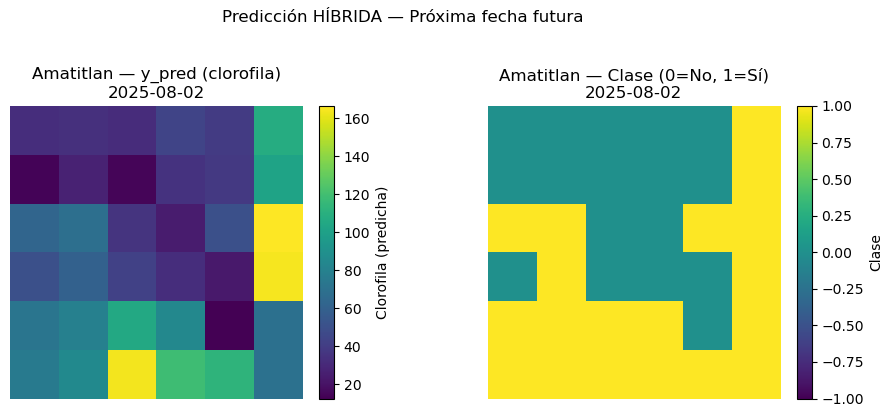

Amatitlan — 2025-08-02 | #Celdas: 36 | No Cianobacteria: 17 | Cianobacteria: 19


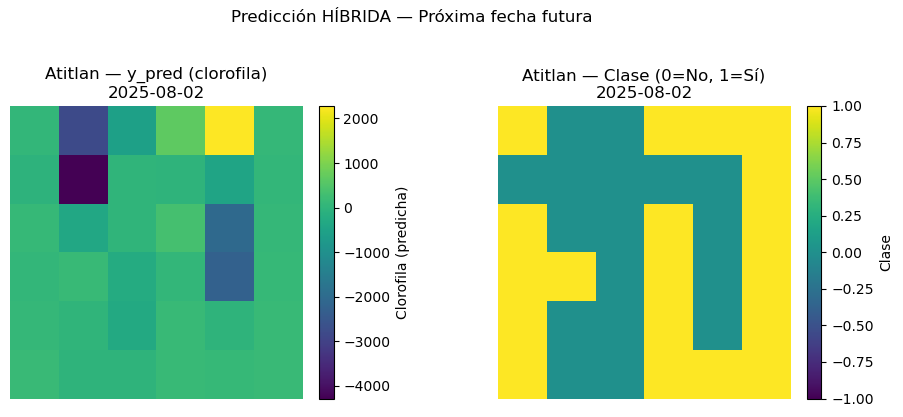

Atitlan — 2025-08-02 | #Celdas: 36 | No Cianobacteria: 17 | Cianobacteria: 19


In [ ]:
# Creación de mapas que muestran las áreas con mayor contaminación
last_hist = df_grid.groupby("lake")["ds"].max().rename("last_hist")
future_candidates = (df_prophet
                     .merge(last_hist, on="lake", how="left")
                     .query("ds > last_hist"))

next_future = (future_candidates
               .groupby("lake")["ds"]
               .min()
               .rename("next_ds")
               .reset_index())

if next_future.empty:
    print("[Aviso] No hay fechas futuras disponibles en df_prophet (verifica HORIZON).")

predictions_per_lake = {}
for _, row in next_future.iterrows():
    lake = row["lake"]
    ds_future = row["next_ds"]

    snap = df_prophet[(df_prophet["lake"]==lake) & (df_prophet["cell_id"].notna()) & (df_prophet["ds"]==ds_future)].copy()
    if snap.empty:
        continue

    snap["y"] = snap["y_pred"]
    snap["month"] = snap["ds"].dt.month
    snap["dayofyear"] = snap["ds"].dt.dayofyear

    X_future = snap[["y", "y_pred", "month", "dayofyear"]].values
    snap["pred_label"] = clf_hybrid.predict(X_future)  

    predictions_per_lake[lake] = snap[["lake","cell_id","ds","y_pred","pred_label"]].copy()

def build_grid_from_snapshot(snap_df, value_col, n_rows, n_cols, fill=np.nan):
    grid = np.full((n_rows, n_cols), fill, dtype=float)
    for _, r in snap_df.iterrows():
        try:
            i, j = map(int, r["cell_id"].split("_"))
            if 0 <= i < n_rows and 0 <= j < n_cols:
                grid[i, j] = float(r[value_col])
        except Exception:
            continue
    return grid

for lake, snap in predictions_per_lake.items():
    ds_future = pd.to_datetime(snap["ds"].iloc[0]).date()

    grid_y = build_grid_from_snapshot(snap, "y_pred", N_ROWS, N_COLS)
    grid_c = build_grid_from_snapshot(snap, "pred_label", N_ROWS, N_COLS, fill=-1)

    vals = grid_y[np.isfinite(grid_y)]
    if vals.size:
        vmin = float(np.nanpercentile(vals, 2))
        vmax = float(np.nanpercentile(vals, 98))
        if vmin == vmax:
            vmin = float(np.nanmin(vals))
            vmax = float(np.nanmax(vals))
    else:
        vmin = vmax = None

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    ax = axes[0]
    m_plot = grid_y.copy()
    if vmin is not None:
        m_plot[~np.isfinite(m_plot)] = vmin
    im1 = ax.imshow(m_plot, vmin=vmin, vmax=vmax)
    ax.set_title(f"{lake} — y_pred (clorofila)\n{ds_future}")
    ax.axis("off")
    cbar1 = fig.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)
    cbar1.set_label("Clorofila (predicha)")

    ax = axes[1]

    im2 = ax.imshow(grid_c, vmin=-1, vmax=1)  
    ax.set_title(f"{lake} — Clase (0=No, 1=Sí)\n{ds_future}")
    ax.axis("off")
    cbar2 = fig.colorbar(im2, ax=ax, fraction=0.046, pad=0.04)
    cbar2.set_label("Clase")

    fig.suptitle(f"Predicción HÍBRIDA — Próxima fecha futura", y=1.03, fontsize=12)
    plt.tight_layout()
    plt.show()

    counts = snap["pred_label"].value_counts().to_dict()
    print(f"{lake} — {ds_future} | #Celdas: {len(snap)} | No Cianobacteria: {counts.get(0,0)} | Cianobacteria: {counts.get(1,0)}")




### Discusión
#### Amatitlán
Los resultados del modelo híbrido aplicados al lago Amatitlán para el 2 de agosto de 2025 muestran que más de la mitad de las celdas de la grilla presentan condiciones de riesgo de proliferación de cianobacterias. En total, 19 de las 36 celdas superaron el umbral establecido, lo que refleja una distribución variada de la contaminación dentro del lago. Esto sí es consistente con la dinámica espacial que se esperaba, porque no todas las áreas del lago reaccionan de la misma forma a factores como temperatura, estacionalidad o aportes externos de nutrientes. La clasificación binaria permite distinguir con claridad las zonas críticas y, en conjunto con las predicciones temporales de clorofila, proporciona una buena visión de las áreas que requieren mayor atención en el monitoreo futuro.

#### Atitlán
Los resultados para el lago de Atitlán fueron similares, con 19 de 36 celdas que superaron el umbral establecido. Como se puede observar en el mapa, las celdas marcadas tienen una distribución mezclada y no con un patrón específico. Las celdas en las que se refleja más la contaminación son las que deben ser atendidas con más cuidado. Se puede decir que la clasificación binaria nos permite observar con bastante certeza las zonas del lago que se encuentran en peligro, y que las predicciones realizadas con el modelo pueden ser de mucha utilidad.